In [2]:
from pathlib import Path
from scenedetect import detect, open_video, AdaptiveDetector, ContentDetector
import matplotlib.pyplot as plt
import librosa
import numpy as np
import allin1

/home/keli/VideoEdit/.oldvenv/lib/python3.12/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
video_dir_path = Path(".") / "data/videos/mashup/WBPQdPqHSqo"
video_path = video_dir_path / "video.mp4"
random_video_path = Path(".") / "output" / "videos" / "random"/ "video.mp4"

In [17]:
result = allin1.analyze(str(video_path))

=> Found 0 tracks already analyzed and 1 tracks to analyze.
=> Found 0 tracks already demixed, 1 to demix.
Selected model is a bag of 1 models. You will see that many progress bars per track.
Separated tracks will be stored in /home/keli/VideoEdit/demix/htdemucs
Separating track /home/keli/VideoEdit/data/videos/mashup/WBPQdPqHSqo/video.mp4
Selected model is a bag of 1 models. You will see that many progress bars per track.
Separated tracks will be stored in /home/keli/VideoEdit/demix/htdemucs
Separating track /home/keli/VideoEdit/data/videos/mashup/WBPQdPqHSqo/video.mp4


=> Found 0 tracks already analyzed and 1 tracks to analyze.
=> Found 0 tracks already demixed, 1 to demix.
Selected model is a bag of 1 models. You will see that many progress bars per track.
Separated tracks will be stored in /home/keli/VideoEdit/demix/htdemucs
Separating track /home/keli/VideoEdit/data/videos/mashup/WBPQdPqHSqo/video.mp4
Selected model is a bag of 1 models. You will see that many progress bars per track.
Separated tracks will be stored in /home/keli/VideoEdit/demix/htdemucs
Separating track /home/keli/VideoEdit/data/videos/mashup/WBPQdPqHSqo/video.mp4


100%|██████████████████████████████████████████████| 163.79999999999998/163.79999999999998 [00:02<00:00, 62.07seconds/s]
100%|██████████████████████████████████████████████| 163.79999999999998/163.79999999999998 [00:02<00:00, 62.07seconds/s]


=> Found 0 tracks already analyzed and 1 tracks to analyze.
=> Found 0 tracks already demixed, 1 to demix.
Selected model is a bag of 1 models. You will see that many progress bars per track.
Separated tracks will be stored in /home/keli/VideoEdit/demix/htdemucs
Separating track /home/keli/VideoEdit/data/videos/mashup/WBPQdPqHSqo/video.mp4
Selected model is a bag of 1 models. You will see that many progress bars per track.
Separated tracks will be stored in /home/keli/VideoEdit/demix/htdemucs
Separating track /home/keli/VideoEdit/data/videos/mashup/WBPQdPqHSqo/video.mp4


100%|██████████████████████████████████████████████| 163.79999999999998/163.79999999999998 [00:02<00:00, 62.07seconds/s]
100%|██████████████████████████████████████████████| 163.79999999999998/163.79999999999998 [00:02<00:00, 62.07seconds/s]


=> Found 0 spectrograms already extracted, 1 to extract.


=> Found 0 tracks already analyzed and 1 tracks to analyze.
=> Found 0 tracks already demixed, 1 to demix.
Selected model is a bag of 1 models. You will see that many progress bars per track.
Separated tracks will be stored in /home/keli/VideoEdit/demix/htdemucs
Separating track /home/keli/VideoEdit/data/videos/mashup/WBPQdPqHSqo/video.mp4
Selected model is a bag of 1 models. You will see that many progress bars per track.
Separated tracks will be stored in /home/keli/VideoEdit/demix/htdemucs
Separating track /home/keli/VideoEdit/data/videos/mashup/WBPQdPqHSqo/video.mp4


100%|██████████████████████████████████████████████| 163.79999999999998/163.79999999999998 [00:02<00:00, 62.07seconds/s]
100%|██████████████████████████████████████████████| 163.79999999999998/163.79999999999998 [00:02<00:00, 62.07seconds/s]


=> Found 0 spectrograms already extracted, 1 to extract.


Extracting spectrograms: 100%|██████████| 1/1 [00:02<00:00,  2.41s/it]

Analyzing video.mp4: 100%|██████████| 1/1 [00:02<00:00,  2.28s/it]



In [3]:
def create_pr_markers_csv(data):
    for name, color, timestamps in data:
        for timestamp in timestamps:
            print(f"{timestamp} {timestamp} {color} segmentation {name}")
    

In [4]:
scene_list = detect(str(video_path), AdaptiveDetector(min_scene_len=5))

In [5]:
distances = list(map(lambda s: min([beat - s for beat in result.beats if beat >= s]) if s <= result.beats[-1] else float('inf'), map(lambda s: s[1].get_seconds(), scene_list)))

In [6]:
len([d for d in distances if d <= 60 / result.bpm / 5]) / len(distances)

0.3652694610778443

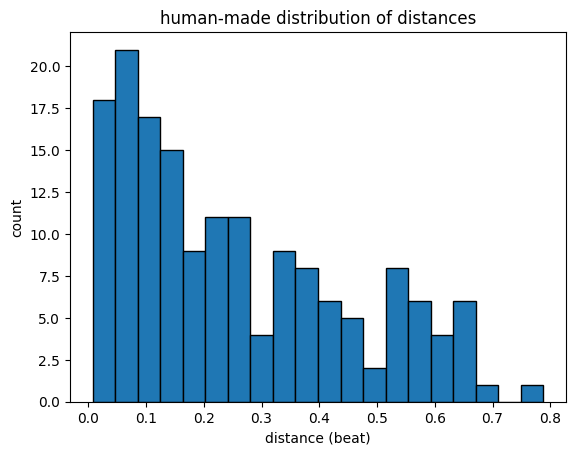

In [7]:
# 绘制距离分布的直方图
plt.hist([x for x in distances if x < 1], bins=20, edgecolor='black')
plt.title('human-made distribution of distances')
plt.xlabel('distance (beat)')
plt.ylabel('count')
plt.show()

In [8]:
scene_list = detect(str(random_video_path), AdaptiveDetector(min_scene_len=5))

In [ ]:
distances = list(map(lambda s: min([beat - s for beat in result.beats if beat >= s]) if s <= result.beats[-1] else float('inf'), map(lambda s: s[1].get_seconds(), scene_list)))
print(len([d for d in distances if d <= 60 / result.bpm / 5]) / len(distances))
# 绘制距离分布的直方图
plt.hist([x for x in distances if x < 1], bins=20, edgecolor='black')
plt.title('random distribution of distances')
plt.xlabel('distance (beat)')
plt.ylabel('count')
plt.show()

In [15]:
result = allin1.analyze("./tools/1.mp4")

=> Found 0 tracks already analyzed and 1 tracks to analyze.
=> Found 0 tracks already demixed, 1 to demix.
Selected model is a bag of 1 models. You will see that many progress bars per track.
Separated tracks will be stored in /home/keli/VideoEdit/demix/htdemucs
Separating track /home/keli/VideoEdit/tools/1.mp4


100%|████████████████████████████████████████████████████████████████████████| 210.6/210.6 [00:03<00:00, 67.86seconds/s]


=> Found 0 spectrograms already extracted, 1 to extract.


Analyzing 1.mp4: 100%|██████████| 1/1 [00:02<00:00,  2.10s/it]


In [16]:
scene_list = detect("./tools/1.mp4", AdaptiveDetector(min_scene_len=5))

0.9745762711864406


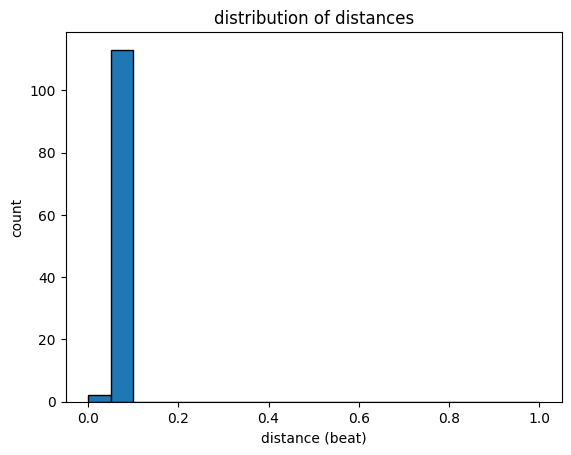

In [17]:
distances = list(map(lambda s: min([beat - s for beat in result.beats if beat >= s]) if s <= result.beats[-1] else float('inf'), map(lambda s: s[1].get_seconds(), scene_list)))
print(len([d for d in distances if d <= 60 / result.bpm / 5]) / len(distances))
# 绘制距离分布的直方图
plt.hist([x for x in distances if x < 1], bins=20, range=(0, 1), edgecolor='black')
plt.title('distribution of distances')
plt.xlabel('distance (beat)')
plt.ylabel('count')
plt.show()

In [18]:
create_pr_markers_csv([
    ("scene", "red", [scene[1].get_seconds() for scene in scene_list]),
    ("beat", "green", result.beats)
])

1.0666666666666667 1.0666666666666667 red segmentation scene
3.533333333333333 3.533333333333333 red segmentation scene
5.966666666666667 5.966666666666667 red segmentation scene
8.366666666666667 8.366666666666667 red segmentation scene
10.833333333333334 10.833333333333334 red segmentation scene
13.3 13.3 red segmentation scene
15.766666666666667 15.766666666666667 red segmentation scene
18.2 18.2 red segmentation scene
20.666666666666668 20.666666666666668 red segmentation scene
23.1 23.1 red segmentation scene
25.566666666666666 25.566666666666666 red segmentation scene
28.0 28.0 red segmentation scene
30.466666666666665 30.466666666666665 red segmentation scene
32.9 32.9 red segmentation scene
34.733333333333334 34.733333333333334 red segmentation scene
35.333333333333336 35.333333333333336 red segmentation scene
37.8 37.8 red segmentation scene
40.233333333333334 40.233333333333334 red segmentation scene
42.7 42.7 red segmentation scene
43.9 43.9 red segmentation scene
44.5333333